In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/new

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/new


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

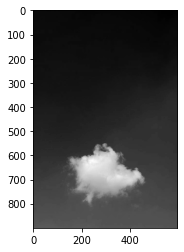

In [ ]:
pic = plt.imread('0.png')
pic = (pic*255).astype(np.uint8)
gray = np.dot(pic, [0.2989, 0.5870, 0.1140]).astype(np.uint8)
plt.imshow(gray, cmap = 'gray')

In [ ]:
(gray[0,0]-gray[100,100])**(0.5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in ubyte_scalars
  """Entry point for launching an IPython kernel.


15.937377450509228

In [ ]:
def all_points(gray):
  all = set()
  for i in range(len(gray)):
    for j in range(len(gray[0])):
      all.add((i, j))
  return all
def get_center_by_set(s, gray):
  sumx, sumy, sumc = 0, 0, 0
  for item in s:
    (x, y) = item
    x, y = np.int32(x), np.int32(y)
    sumx += x
    sumy += y
    sumc += gray[x, y]
  return sumx/len(s), sumy/len(s), sumc/len(s)
def dis(gray, a, b, c):
  a = np.int32(a)
  b = np.int32(b)
  # c = np.int32(c)
  # d = np.int32(d)
  # return ((a-c)**2 + (b-d)**2 + ((gray[a][b]-gray[c][d])*5)**2)**(0.5)
  return (gray[a][b]-c)**2

In [ ]:
def get_new_set(all_points, gray, s1, s2):
  x1, y1, c1 = get_center_by_set(s1, gray)
  x2, y2, c2 = get_center_by_set(s2, gray)
  for (x, y) in all_points:
    dis1 = dis(gray, x, y, c1)
    dis2 = dis(gray, x, y, c2)
    if dis1 < dis2:
      s1.add((x, y))
    else:
      s2.add((x, y))
  return s1, s2

In [ ]:
def get_ans(gray):
  set1, set2, s1, s2 = set(),set(),set(),set()
  set2.add((len(gray)//2, len(gray)//2))
  set1.add((0, 0))
  points = all_points(gray)
  count = 0
  while True:
    s1, s2 = get_new_set(points, gray, set1.copy(), set2.copy())
    if count > 20 or get_center_by_set(s1, gray)==get_center_by_set(set1, gray):
      break
    x1, y1, c1 = get_center_by_set(s1, gray)
    x2, y2, c2 = get_center_by_set(s2, gray)
    set1, set2 = {(x1, y1)}, {(x2, y2)}
    count += 1
  return s1, s2

In [ ]:
!pip install -Uqq ipdb
import ipdb
%pdb off

Automatic pdb calling has been turned OFF


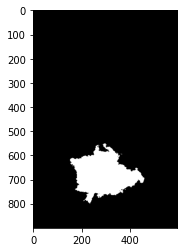

In [ ]:
set1, set2 = get_ans(gray)
for (x, y) in set1:
  x = np.int32(x)
  y = np.int32(y)
  gray[x ,y] = 0
for (x, y) in set2:
  x = np.int32(x)
  y = np.int32(y)
  gray[x ,y] = 255
plt.imshow(gray, cmap='gray')